## 걸음수와 소비 칼로리 회귀분석을 통한 목표 칼로리 계산

- 스마트워치에서는 주간목표를 걸음수나 칼로리 둘 중 하나만 선택 가능
- 걸음수로 목표를 선택하니, 사이클로 칼로리 소비시 목표 반영 안 됨
- 걸음수와 칼로리와의 회귀분석으로, 칼로리 목표를 만들어보자 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

####실측 데이터 : 최근 몇 주 동안 스마트와치에 기록된 걸음수와 칼로리

In [3]:
walk = [110566, 44498, 55368, 64705, 40837, 78101, 89357]
cal = [13107, 6913, 7778, 9326, 5090, 9669, 11788]

df = pd.DataFrame({'walk':walk, 'cal':cal})
df

,cal,walk
0,13107,110566
1,6913,44498
2,7778,55368
3,9326,64705
4,5090,40837
5,9669,78101
6,11788,89357


#### 상관계수와 산점도 차트로 걸음수와 소비 칼로리의 관계를 살펴보자

In [4]:
df.corr()

,cal,walk
cal,1.000000,0.974965
walk,0.974965,1.000000


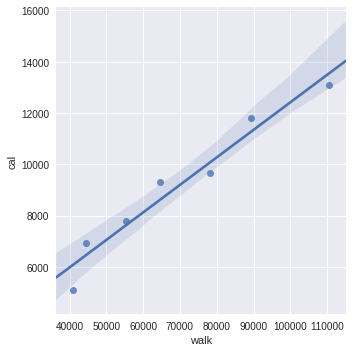

In [5]:
g = sns.lmplot(x='walk', y='cal', data=df)

완벽한 선형관계를 보인다. 

#### 회귀분석으로 주간 목표 걸음수에 맞는 칼로리를 찾아보자

- 주간 목표 걸음수 : 119,000걸음(하루 1.7만보 * 7일) -> 칼로리로 환산한다면?

In [6]:
week_walk_target = 17000 * 7
print("주간 걸음수 목표 : {:,}".format(week_walk_target))

주간 걸음수 목표 : 119,000


In [7]:
from sklearn import linear_model

X = df['walk'].values.reshape(-1, 1)
y = df['cal'].values

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print("회귀식 : y = {0:5.1f} + {1:5.4f} * X".format(regr.intercept_, regr.coef_[0]))

회귀식 : y = 1688.3 + 0.1073 * X


In [9]:
pred = regr.predict([[week_walk_target]])[0]
print("한 주간의 걸음목표에 상응하는 칼로리 목표는? ==> {:6.0f} kcal".format(pred))

한 주간의 걸음목표에 상응하는 칼로리 목표는? ==>  14452 kcal


#### 결론 : 한주간 11.9만 걸음에 해당하는 목표 칼로리는 약 1.4만 kcal